# <center>Livrable Projet DATA SCIENCE</center>

!pip3 install opencv-python

## Livrable 1 - Prétraitement (denoising/sharpening…)

Le but est de traiter un ensemble de photographies afin de les rendre mieux traitables par les algorithmes de Machine Learning. Il y a deux traitements à réaliser : le débruitage, et l’affutage. Vous devrez produire un notebook Jupyter explicitant ces étapes de prétraitement, et leurs performances. Ces algorithmes s’appuieront sur des notions assez simples autour des filtres de convolution, et les appliqueront pour améliorer la qualité de l’image. Il faudra notamment décider d’un compromis entre dé-bruitage et affutage.

Le notebook devra intégrer :
<ul>
    <li>Le code de chargement du fichier.</li>
    <li>Le code du débruitage sur un sous-ensemble d’images bruitées. Le code doit être accompagné d’explications.</li>
    <li>Le code de l’affutage sur un sous-ensembles d’images floutées. Le code doit être accompagné d’explications.</li>
    <li>
        Une étude de cas explicitant les compromis entre ces deux opérations. Cette partie du livrable doit inclure le bruitage d’images et montrer la perte de détails, ou l’affutage d’images et montrer l’apparition du bruit.
    </li>
</ul>

<b>Ce livrable est à fournir pour le 18/12/2020</b>

In [1]:
!pip3 install opencv-python

In [1]:
import os
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2

In [2]:
def get_image(path, filename, number, extension):
    return io.imread(path + filename + str(number).zfill(3) + extension)

def save_image(path, filename, number, extension, content):
    #Check if folder exists
    if not os.path.isdir(path):
        os.makedirs(path)
    imageio.imwrite(path + filename + str(number).zfill(3) + extension, content)
    
def get_file_amount(path):
    return len(os.listdir(path))

In [3]:
def display_image(index_img, image):
    ax = axs[index_img//10, index_img%10]
    ax.axis('off')
    ax.set_title("Image n° "+ str(index_img+1))
    ax.imshow(image)

## Défloutage de l'image

Pour le défloutage des images, on utilise un filtre Laplacien. Ce filtre nous permet d'affuter les images grâce à une fonction de convolution de la librairie opencv sur l'image récupérée.

La variante de filtre choisie nous permet sur le jeu de données fourni d'affuter les images suffisemment pour retirer le flou présent sans pour autant y ajouter de bruit.

In [4]:
# Deblurring function
def remove_blur(image):
    # Creation of a Laplacian kernel to use for debluring
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    
    # Convolution of the kernel with the image given in the function's parameter
    return cv2.filter2D(img, -1, kernel)

def get_blurry_indicator(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(gray_image, cv2.CV_64F).var()
    return fm

In [5]:
# Get amount of file
file_number = get_file_amount("./Dataset/Blurry/")
# file_number

In [ ]:
# Should be removed if we don't want to diplay the images
fig, axs = plt.subplots(file_number//10, 10, figsize=(40,40))

# Looping on the different images in order to process them
for i in range(0, file_number):
    # Open single picture
    img = get_image("./Dataset/Blurry/", "blurry_", i+1, ".jpg")

    # Get initial Blur metric
    original_blur_metric = get_blurry_indicator(img)
    
    # Remove blur from the colored image image
    deblurred_img = remove_blur(img)

    # Get initial Blur metric
    processed_blur_metric = get_blurry_indicator(deblurred_img)
    
    print("image N°" + str(i) + " - initial : " + str(original_blur_metric)
        + " processed : " + str(processed_blur_metric)
        + "difference : " + str(processed_blur_metric - original_blur_metric))
    
    # Image diplay
    display_image(i, deblurred_img)
    
    # Saving Image
    save_image("./Dataset/processed/deblurred/", "deblurred_", i+1, ".jpg", deblurred_img)

# Display the images
plt.show()

image N°0 - initial : 390.7673519051332 processed : 13410.618113005896difference : 13019.850761100763
image N°1 - initial : 57.94196801647993 processed : 1995.2069001352468difference : 1937.2649321187669
image N°2 - initial : 543.4893020025411 processed : 16459.125883907385difference : 15915.636581904844
image N°3 - initial : 211.15313447986694 processed : 6320.515998252595difference : 6109.362863772728
image N°4 - initial : 217.2125055141808 processed : 6956.960281603873difference : 6739.747776089693
image N°5 - initial : 933.0402659413378 processed : 26181.393011246924difference : 25248.352745305587
image N°6 - initial : 164.75207186533612 processed : 5579.693269093568difference : 5414.941197228232
image N°7 - initial : 184.83940115627325 processed : 6681.927745737502difference : 6497.088344581229
image N°8 - initial : 315.5233399359275 processed : 11028.951293359103difference : 10713.427953423175
image N°9 - initial : 276.65523724788625 processed : 9280.894212055351difference : 9004

image N°82 - initial : 121.36500121383823 processed : 3648.17533201849difference : 3526.8103308046516
image N°83 - initial : 68.4941767736905 processed : 2241.747120745015difference : 2173.2529439713244
image N°84 - initial : 222.56349602500651 processed : 7077.587514583738difference : 6855.024018558732
image N°85 - initial : 211.45104410986164 processed : 6780.361574872351difference : 6568.9105307624895
image N°86 - initial : 55.7666109190302 processed : 1812.980424171415difference : 1757.2138132523849
image N°87 - initial : 1283.3401076568982 processed : 33922.544000100774difference : 32639.203892443875
image N°88 - initial : 126.15966430534795 processed : 4066.345437760147difference : 3940.185773454799
image N°89 - initial : 45.582799310938526 processed : 1615.1910692934564difference : 1569.6082699825179
image N°90 - initial : 208.40308465093545 processed : 5411.5478086871935difference : 5203.144724036258
image N°91 - initial : 197.77359237670896 processed : 8341.81749185383differen

## Débruitage
La capture d'un signal lumineux par un appareil photographique s'accompagne le plus souvent d'informations non désirées : le « bruit ». L'essentiel de ce « bruit » (des pixels trop clairs ou trop sombre en trop grand nombre ou de manière irrégulière, par exemple) est dû au capteur.

### Le débruitage par morceaux (par patchs)
La méthode repose sur un principe simple, remplacer la couleur d'un pixel par une moyenne des couleurs de pixels similaires. Mais les pixels les plus similaires à un pixel donné n'ont aucune raison d'être proches. Il est donc nécessaire de scanner une vaste partie de l'image à la recherche de tous les pixels qui ressemblent vraiment au pixel que l'on veut débruiter.

### Pourquoi cette methode ?
Le résultat d'un tel filtrage permet d’amoindrir la perte de détails au sein de l'image, comparé aux filtres réalisant des moyennes localement tel que le filtre de Gauss ou le filtre de Wiener, le bruit généré par l'algorithme "non-local means" est plus proche du bruit blanc.

In [8]:
# Remove Noise function
def remove_noise(image):
    return cv2.fastNlMeansDenoisingColored(image,None,10,10,7,15)

In [9]:
# Get amount of file
file_number = get_file_amount("./Dataset/Noisy/")
# file_number

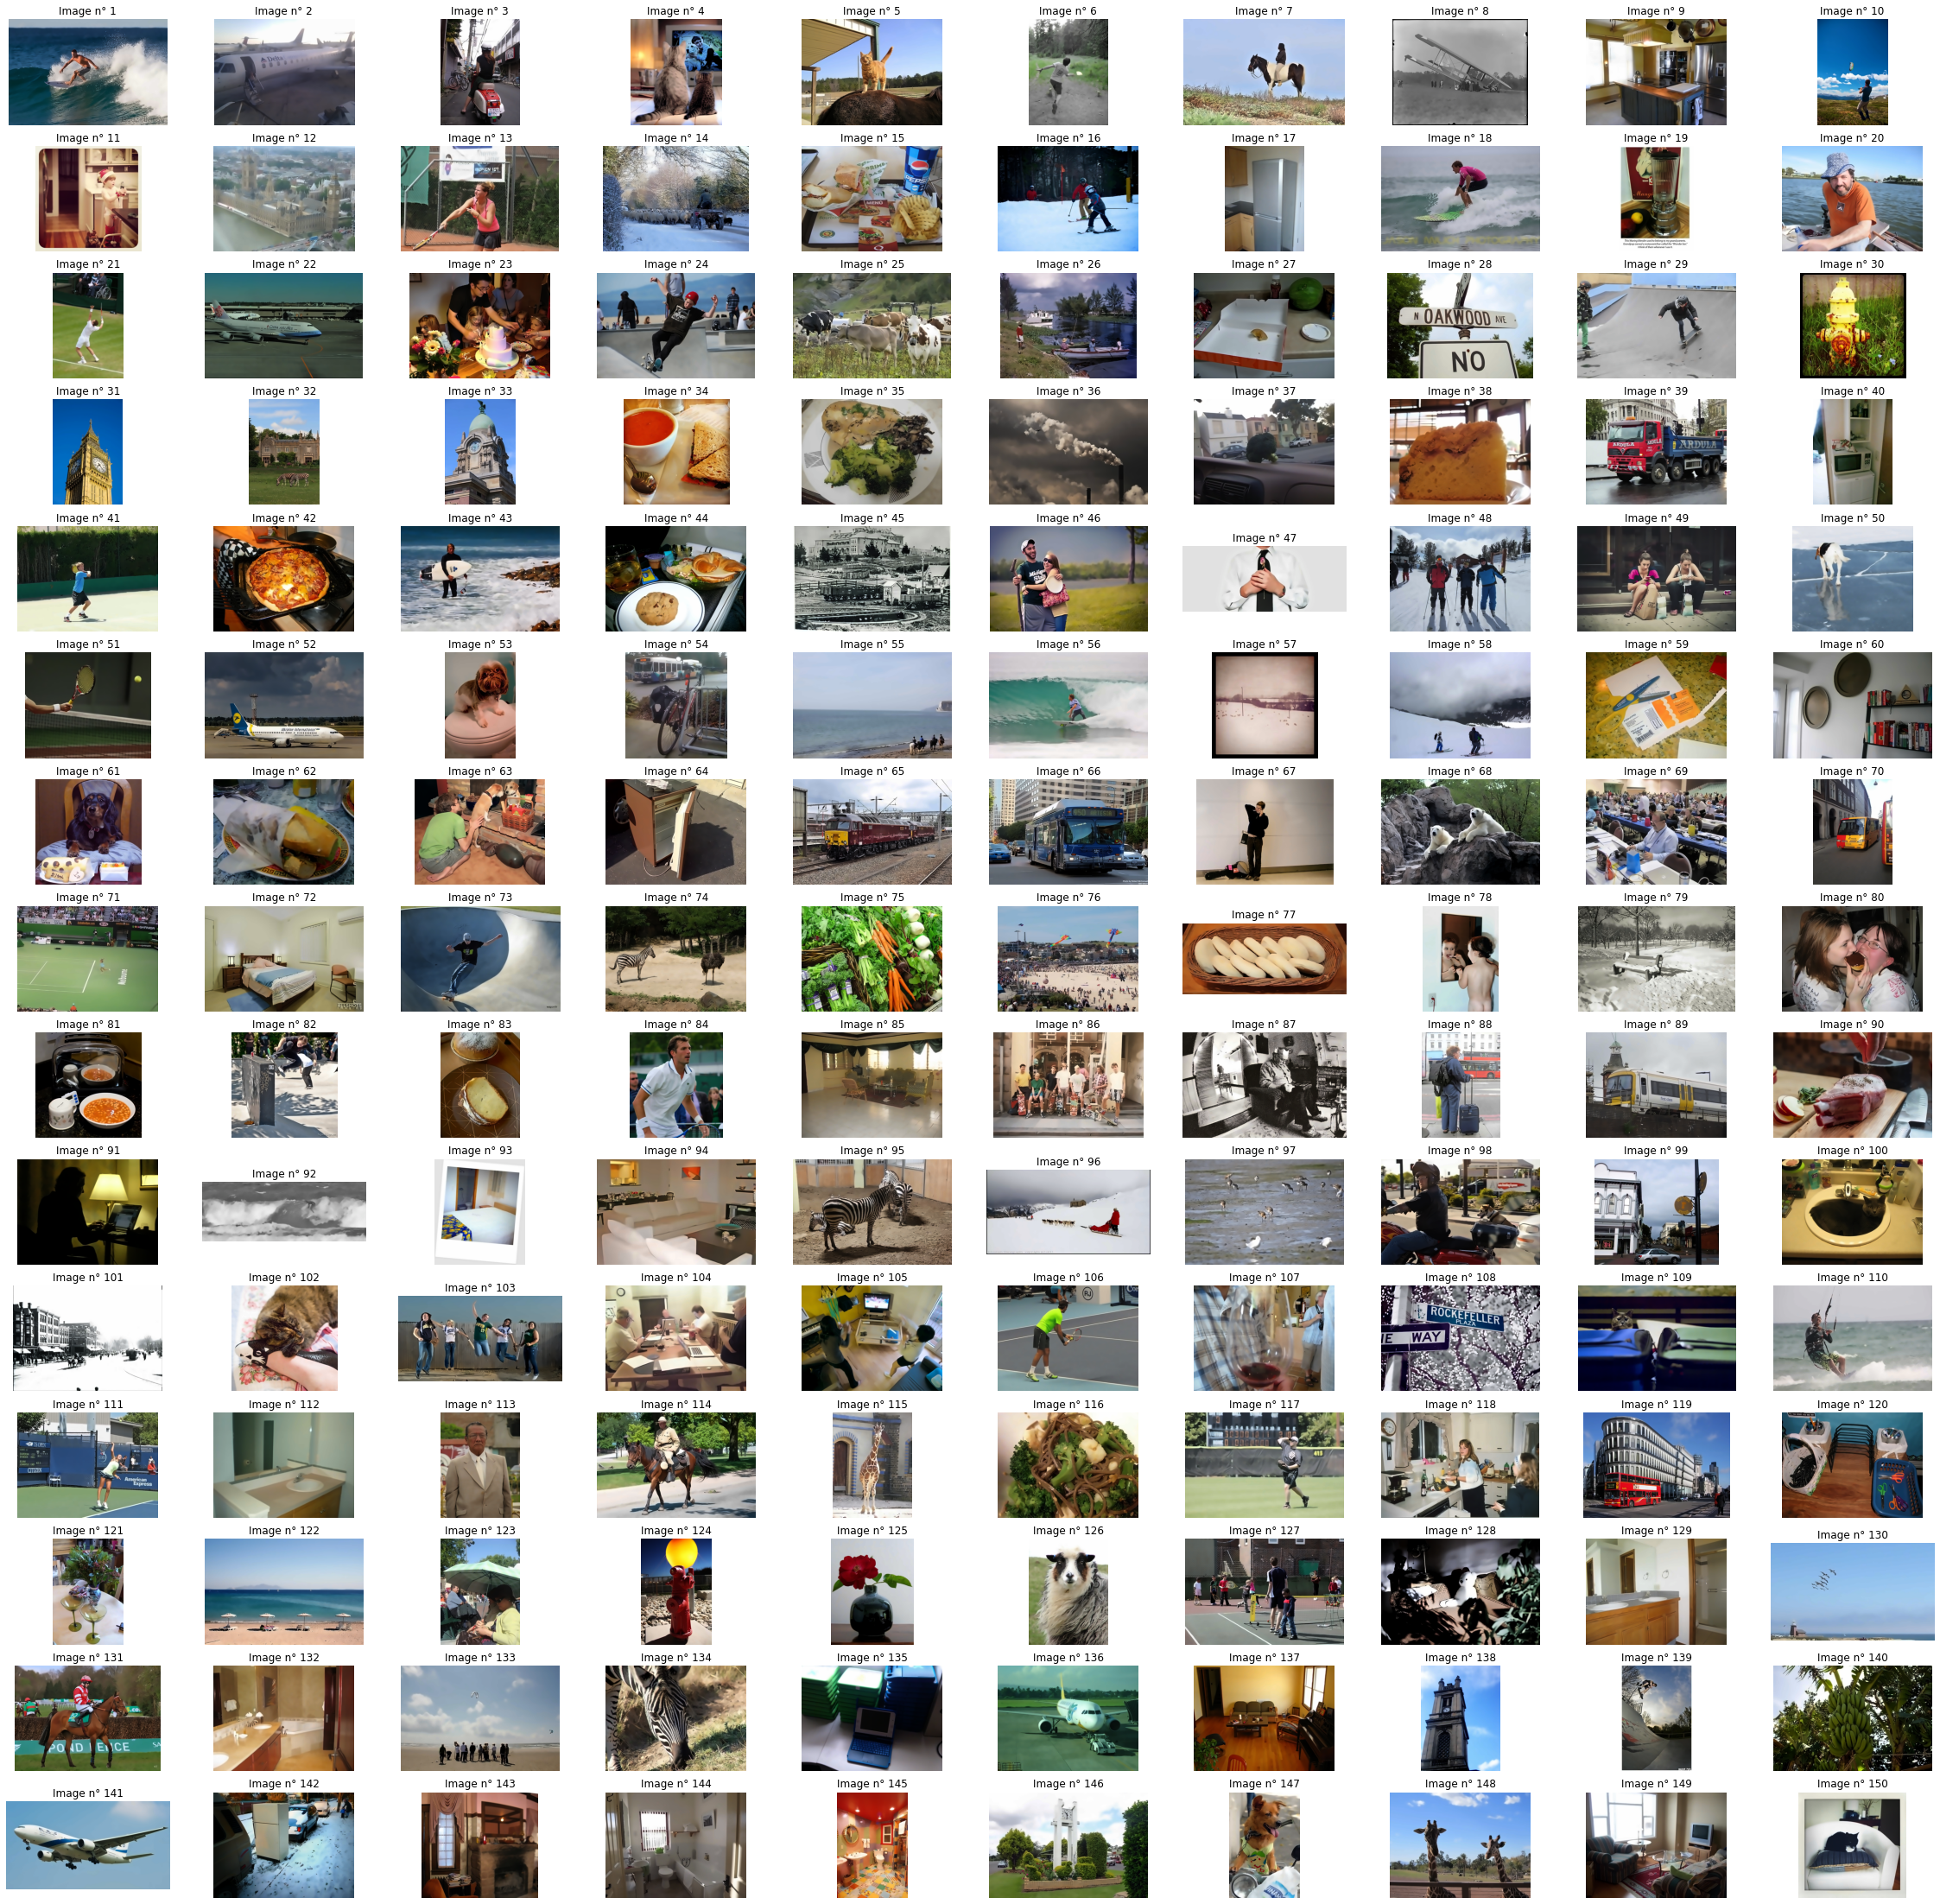

In [10]:
# Should be removed if we don't want to diplay the images
fig, axs = plt.subplots(file_number//10, 10, figsize=(40,40))

for i in range(0, file_number):
    # Open single picture
    img = get_image("./Dataset/Noisy/", "noisy_", i+1, ".jpg")

    # Remove blur from grey image
    denoised_img = remove_noise(img)

    # Image diplay
    display_image(i, denoised_img)
    
    # Saving Image
    save_image("./Dataset/processed/denoised/", "denoised_", i+1, ".jpg", denoised_img)
    
# Display the images
plt.show()